# 一つの変数の記述統計

### 質的変数
カテゴリー分けとして使用される変数。<br>
男か女か、都道府県など。
### 量的変数
連続的な数値をとる変数。<br>
テストの点数や面積や身長など。

## データの視覚的表現

In [16]:
指導法 <- c('C' ,'D', 'D', 'C', 'B', 'A', 'B' ,'A' ,'A' ,'D' ,'D' ,'B' ,'D' ,'A' ,'A' ,'D' ,'B' ,'C' ,'D' ,'C')
指導法

[1] "C" "D" "D" "C" "B" "A" "B" "A" "A" "D" "D" "B" "D" "A" "A" "D" "B" "C" "D"
[20] "C"

In [18]:
table(指導法)

指導法
A B C D 
5 4 4 7 

In [23]:
心理学テスト <- c(9 ,6 ,7 ,6 ,10 ,8 ,4 ,14, 7 ,13 ,5 ,5 ,7 ,6 ,6 ,12 ,10 ,8 ,7 ,13)

心理学テスト
 4  5  6  7  8  9 10 12 13 14 
 1  2  4  4  2  1  2  1  2  1 

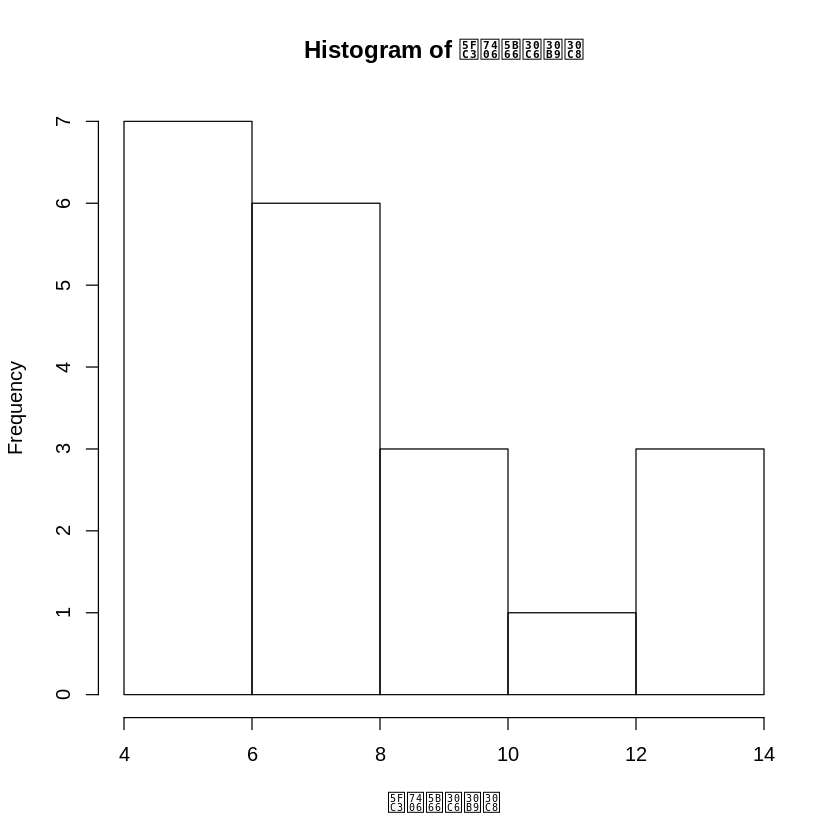

In [25]:
table(心理学テスト)
hist(心理学テスト)

## 2.5 平均とは

In [28]:
sum(心理学テスト)/20 # 20は「心理テスト」のサンプルの数。(rnorm(20,mean=10, sd=3))

[1] 8.15

In [32]:
#こっちの方がスマート

heikin <- function(data){
    sum(心理学テスト)/length(心理学テスト)
}

heikin(心理学テスト)

[1] 8.15

平均値以外にも代表値は存在します。

### 中央値 (median)
値を背の順に並べて、ちょうど真ん中の値のこと。<br>
偶数の場合は、真ん中の値を足して２でわる。
### 最頻値 (mode)
登場した数値の中でもっとも多く登場した数。

In [33]:
10 %% 4

[1] 2

In [139]:
chuoti <- function(data){
    data <- sort(data)
    if(length(data) %% 2 == 0){
        mode_1 <- data[length(data)/2] 
        mode_2 <- data[length(data)/2 +1]
        goukei <- mode_1 + mode_2 
        goukei /2
    }
    else{
        index_mode <- length(data)
        index_mode <- round(index_mode)
        data[index_mode]
    }
}

## 2.8 分散、標準偏差

擬似的にテストデータを作成。<br>
rnorm(20 , mean=60 , sd=10)

[1] 61 53 53 55 57 64 66 61 51 58 69 65 42 86 65 64 81 63 43 64

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  42.00   54.50   62.00   61.05   65.00   86.00 

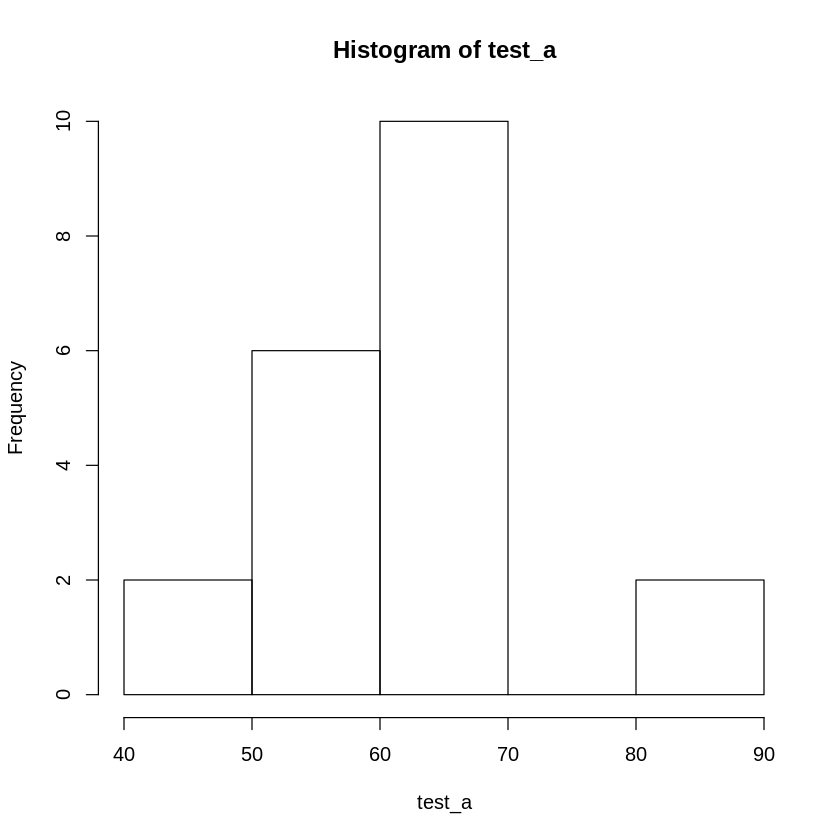

In [152]:
test_a <- rnorm(20 , mean = 60 , sd = 10 )
test_a <- round(test_a)
test_a
summary(test_a)
hist(test_a)

In [158]:
test_mean <- mean(test_a)
test_mean

[1] 61.05

偏差とは何か……

In [160]:
test_dev <- test_a - test_mean
test_dev
sum(test_dev)　# 偏差の合計はゼロ……だけど割り算で出た誤差がでてますね。

[1]  -0.05  -8.05  -8.05  -6.05  -4.05   2.95   4.95  -0.05 -10.05  -3.05
[11]   7.95   3.95 -19.05  24.95   3.95   2.95  19.95   1.95 -18.05   2.95

[1] 5.684342e-14

偏差を２乗することで、偏差の大きさを評価しやすくなる。

In [165]:
test_dev_sq <- test_dev**2
test_dev_sq

[1]   0.0025  64.8025  64.8025  36.6025  16.4025   8.7025  24.5025   0.0025
 [9] 101.0025   9.3025  63.2025  15.6025 362.9025 622.5025  15.6025   8.7025
[17] 398.0025   3.8025 325.8025   8.7025

分散を計算してみよう。

In [169]:
test_dev_sq_sum <- sum(test_dev_sq)
test_variance <- test_dev_sq_sum / length(test_dev_sq)
test_variance

[1] 107.5475

分散の平方根が「標準偏差」になります。

In [171]:
test_sd <- sqrt(test_variance)
test_sd #元の分布は sd=10 だったので妥当。

[1] 10.37051

まぁ、分散も標準偏差も関数が用意されているんですけど。<br>
(不偏分散なのでn-1で割っているので数字が違います)


In [174]:
# 分散の関数F¥
var(test_a )
# 標準偏差の関数
sd(test_a)

[1] 113.2079

[1] 10.63992

## 2.9 分散、標準偏差以外の散布度

In [178]:
test_a
test_mean <- mean(test_a)
mean(test_a)

[1] 61 53 53 55 57 64 66 61 51 58 69 65 42 86 65 64 81 63 43 64

[1] 61.05

それぞれの偏差を平均すると「平均偏差」

In [182]:
test_dev <- abs(test_a - test_mean)
abs(test_a - test_mean)
# ここが平均偏差
mean(test_dev)

[1]  0.05  8.05  8.05  6.05  4.05  2.95  4.95  0.05 10.05  3.05  7.95  3.95
[13] 19.05 24.95  3.95  2.95 19.95  1.95 18.05  2.95

[1] 7.65

**最大値 (max)** :　データの中で一番大きい値<br>
**最小値 (min)** : データの中で一番小さい値<br>
<br>
**範囲** : minからmaxまで


In [184]:
min_a <- min(test_a)
min_a
max_a <- max(test_a)
max_a

range_a <- max_a - min_a 
range_a

[1] 42

[1] 86

[1] 44

In [185]:
range(test_a)

[1] 42 86

## 2.10 標準化
平均と標準偏差がある特定の値になるように、全データの値を同じ式を使用して変換すること。<br>
変換した値を**標準化得点**と言います。<br><br>
$$
    Z得点 = \frac{データの値 - 平均}{標準偏差}
$$

In [186]:
test_a

[1] 61 53 53 55 57 64 66 61 51 58 69 65 42 86 65 64 81 63 43 64

In [188]:
test_mean <- mean(test_a)
test_mean

[1] 61.05

sd関数を使用すると、不偏分散で計算してしまうので、<br>
今回は自分で標準偏差を書きます。

In [195]:
test_sd <- test_a - test_mean # ここで偏差を出す。
test_sd <- test_sd ** 2 # ここで偏差を２乗する。
test_sd <- mean(test_sd) #ここで偏差の平均を出す。
test_sd <- sqrt(test_sd) # ここで偏差の平均の、２乗根を出して「標準偏差」の完成！
test_sd

[1] 10.37051

ここからZ得点を出します。

In [196]:
zpoint <- (test_a - test_mean)/test_sd
zpoint

[1] -0.004821363 -0.776239468 -0.776239468 -0.583384942 -0.390530416
 [6]  0.284460426  0.477314952 -0.004821363 -0.969093994 -0.294103152
[11]  0.766596742  0.380887689 -1.836939362  2.405860214  0.380887689
[16]  0.284460426  1.923723899  0.188033163 -1.740512099  0.284460426

ちゃんとそれっぽくなっているか、確認をとる

In [197]:
mean(zpoint) # zpointの平均は、ほぼゼロ(定義上はゼロ)

[1] 2.726972e-16

In [204]:
sqrt(mean((zpoint - mean(zpoint))**2)) # 標準偏差は１になるはず。

[1] 1

## 2.11 偏差値

$$
偏差値 = z得点*10 + 50
$$

In [206]:
dev_val <- (10*zpoint) +50 
dev_val

[1] 49.95179 42.23761 42.23761 44.16615 46.09470 52.84460 54.77315 49.95179
 [9] 40.30906 47.05897 57.66597 53.80888 31.63061 74.05860 53.80888 52.84460
[17] 69.23724 51.88033 32.59488 52.84460

In [208]:
mean(dev_val)
sqrt(mean((dev_val - mean(dev_val))**2))

[1] 50

[1] 10